In [467]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
plt.rcParams["figure.figsize"] = (20,10)

In [466]:
def getTasa(time,corpus_size):
    corpus_size_bits = corpus_size*8
    corpus_size_mb   = corpus_size/125000
    tasa_bits_secs   = corpus_size_bits/time
    tasa_bytes_secs  = corpus_size/time
    tasa_mb_secs     = corpus_size_mb/time
    return {'BITS/SEC':(corpus_size_bits,tasa_bits_secs),'BYTES/SEC':(corpus_size,tasa_bytes_secs),'MB/SEC':(corpus_size_mb,tasa_mb_secs)}
def getInfo(**kwargs):
    dfa              = kwargs.get('df') 
    time             = dfa.TIME.sum()/1000
    time_min         = time/60
    corpus_size      = dfa.FILE_SIZE.sum()
    tasas            = getTasa(time,corpus_size)
    tasa_bits_secs   = tasas['BITS/SEC']
    tasa_bytes_secs  = tasas['BYTES/SEC']
    tasa_mb_secs     = tasas['MB/SEC']
    keyLen           = dfa.KEY_LENGTH.unique()[0]
    cipher           = dfa.CIPHER.unique()[0]+"[{}]".format(keyLen)
    
    return (cipher,time,time_min,*tasa_bits_secs,*tasa_bytes_secs,*tasa_mb_secs)
    

# Cipher(Encrypt mode)

In [474]:
df      = pd.read_csv('data.csv')
des     = df.loc[df.CIPHER=='DES']
desede  = df.loc[df.CIPHER=='DESede']
aes_128 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==128]
aes_192 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==192]
aes_256 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==256].loc[df.KDF!='PBKDF2WithHmacSHA384'].loc[df.KDF!='PBKDF2WithHmacSHA512']
# 
aes_256_sha384 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA384']
df.loc[aes_256_sha384.index,'CIPHER']="AES_SHA384"
aes_256_sha384 = df.loc[df.CIPHER=='AES_SHA384'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA384']
# 
aes_256_sha512 = df.loc[df.CIPHER=='AES'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA512']
df.loc[aes_256_sha512.index,'CIPHER']="AES_SHA512"
aes_256_sha512 = df.loc[df.CIPHER=='AES_SHA512'].loc[df.KEY_LENGTH==256].loc[df.KDF=='PBKDF2WithHmacSHA512']
infos = list(map(lambda x:getInfo(df=x),(des,desede,aes_128,aes_192,aes_256,aes_256_sha384,aes_256_sha512)))
aes_256

FILE_NAME  FILE_SIZE  TIME                   KDF CIPHER  \
4704   650.txt    1048575   375  PBKDF2WithHmacSHA256    AES   
4705   916.txt    1048575   113  PBKDF2WithHmacSHA256    AES   
4706   276.txt    1048575    90  PBKDF2WithHmacSHA256    AES   
4707  1483.txt    1048575    69  PBKDF2WithHmacSHA256    AES   
4708  1122.txt    1048575    64  PBKDF2WithHmacSHA256    AES   
...        ...        ...   ...                   ...    ...   
5875   518.txt    1048575    44  PBKDF2WithHmacSHA256    AES   
5876   115.txt    1048575    51  PBKDF2WithHmacSHA256    AES   
5877   512.txt    1048575    48  PBKDF2WithHmacSHA256    AES   
5878   643.txt    1048575    51  PBKDF2WithHmacSHA256    AES   
5879   699.txt    1048575    47  PBKDF2WithHmacSHA256    AES   

            TRANSFORMATION  KEY_LENGTH  
4704  AES/CBC/PKCS5Padding         256  
4705  AES/CBC/PKCS5Padding         256  
4706  AES/CBC/PKCS5Padding         256  
4707  AES/CBC/PKCS5Padding         256  
4708  AES/CBC/PKCS5Padding         256  
...                    ...         ...  
5875  AES/CBC/PKCS5Padding         256  
5876  AES/CBC/PKCS5Padding         256  
5877  AES/CBC/PKCS5Padding         256  
5878  AES/CBC/PKCS5Padding         256  
5879  AES/CBC/PKCS5Padding         256  

[1176 rows x 7 columns]

# Cipher(Decrypt mode)

In [482]:
dff  = pd.read_csv('data_decrypted.csv')
dff.head(5)
_des     = dff.loc[dff.CIPHER=='DES']
_desede  = dff.loc[dff.CIPHER=='DESede']
_aes_128 = dff.loc[dff.CIPHER=='AES'].loc[dff.KEY_LENGTH==128]
_aes_192 = dff.loc[dff.CIPHER=='AES'].loc[dff.KEY_LENGTH==192]
_aes_256 = dff.loc[dff.CIPHER=='AES'].loc[dff.KEY_LENGTH==256].loc[dff.KDF!='PBKDF2WithHmacSHA384'].loc[df.KDF!='PBKDF2WithHmacSHA512']



# 
_aes_256_sha384 = dff.loc[df.CIPHER=='AES'].loc[dff.KEY_LENGTH==256].loc[dff.KDF=='PBKDF2WithHmacSHA384']
dff.loc[aes_256_sha384.index,'CIPHER']="AES_SHA384"
_aes_256_sha384 = dff.loc[dff.CIPHER=='AES_SHA384'].loc[dff.KEY_LENGTH==256].loc[dff.KDF=='PBKDF2WithHmacSHA384']
# 
_aes_256_sha512 = dff.loc[df.CIPHER=='AES'].loc[dff.KEY_LENGTH==256].loc[dff.KDF=='PBKDF2WithHmacSHA512']
dff.loc[aes_256_sha512.index,'CIPHER']="AES_SHA512"
_aes_256_sha512 = dff.loc[df.CIPHER=='AES_SHA512'].loc[dff.KEY_LENGTH==256].loc[dff.KDF=='PBKDF2WithHmacSHA512']
_infos = list(map(lambda x:getInfo(df=x),(_des,_desede,_aes_128,_aes_192,_aes_256,_aes_256_sha384,_aes_256_sha512)))

# RESULTADOS

In [483]:
info_df = pd.DataFrame(infos,columns=["CIPHER","TIME(SEC)","TIME(MIN)","SIZE(BITS)","TASA(BITS/SEC)","SIZE(BYTES)","TASA(BYTES/SEC)","SIZE(MB)","TASA(MB/SEC)"])
info_df = info_df.sort_values("TIME(SEC)",ascending=True)
info_df

CIPHER  TIME(SEC)  TIME(MIN)   SIZE(BITS)  TASA(BITS/SEC)  \
2         AES[128]    122.400   2.040000  20665220656    1.688335e+08   
6  AES_SHA512[256]    127.299   2.121650  20665220656    1.623361e+08   
3         AES[192]    133.092   2.218200  20665220656    1.552702e+08   
4         AES[256]    137.553   2.292550  20665220656    1.502346e+08   
5  AES_SHA384[256]    140.400   2.340000  20665220656    1.471882e+08   
0          DES[64]    202.504   3.375067  20665220656    1.020485e+08   
1      DESede[192]    396.793   6.613217  20665220656    5.208061e+07   

   SIZE(BYTES)  TASA(BYTES/SEC)      SIZE(MB)  TASA(MB/SEC)  
2   2583152582     2.110419e+07  20665.220656    168.833502  
6   2583152582     2.029201e+07  20665.220656    162.336080  
3   2583152582     1.940877e+07  20665.220656    155.270194  
4   2583152582     1.877933e+07  20665.220656    150.234605  
5   2583152582     1.839852e+07  20665.220656    147.188181  
0   2583152582     1.275606e+07  20665.220656    102.048457  
1   2583152582     6.510076e+06  20665.220656     52.080608

<AxesSubplot:xlabel='CIPHER', ylabel='TIME(SEC)'>

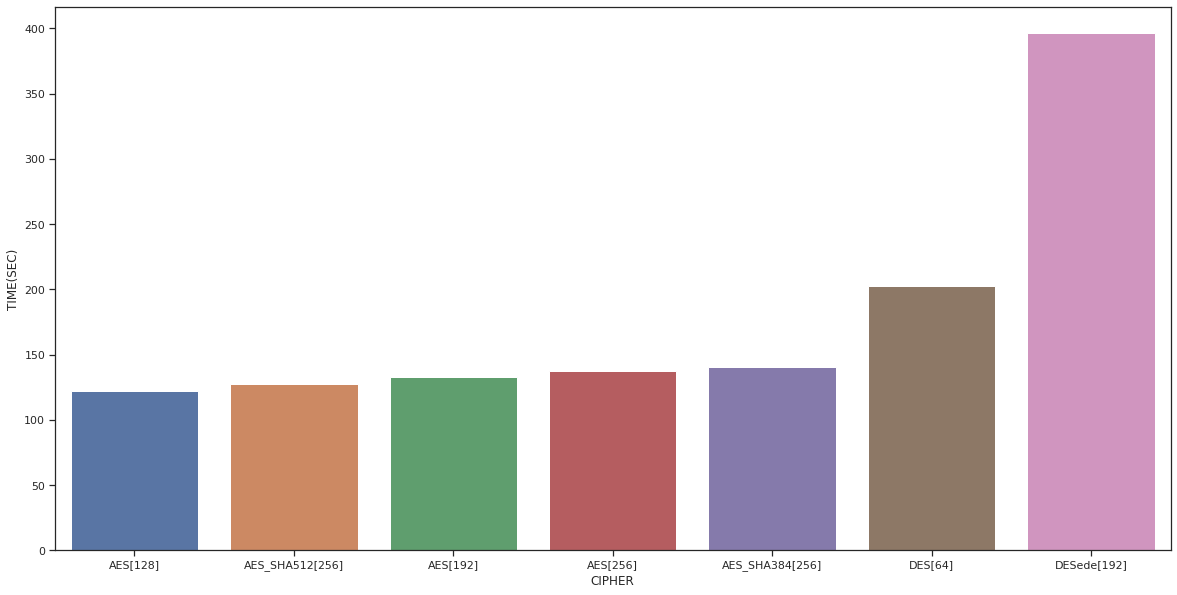

In [491]:
# ciphers  = info_df.CIPHER
# time_sec = info_df['TIME(SEC)']
sns.barplot(x="CIPHER",y="TIME(SEC)",data=info_df)

<AxesSubplot:xlabel='CIPHER', ylabel='TASA(BITS/SEC)'>

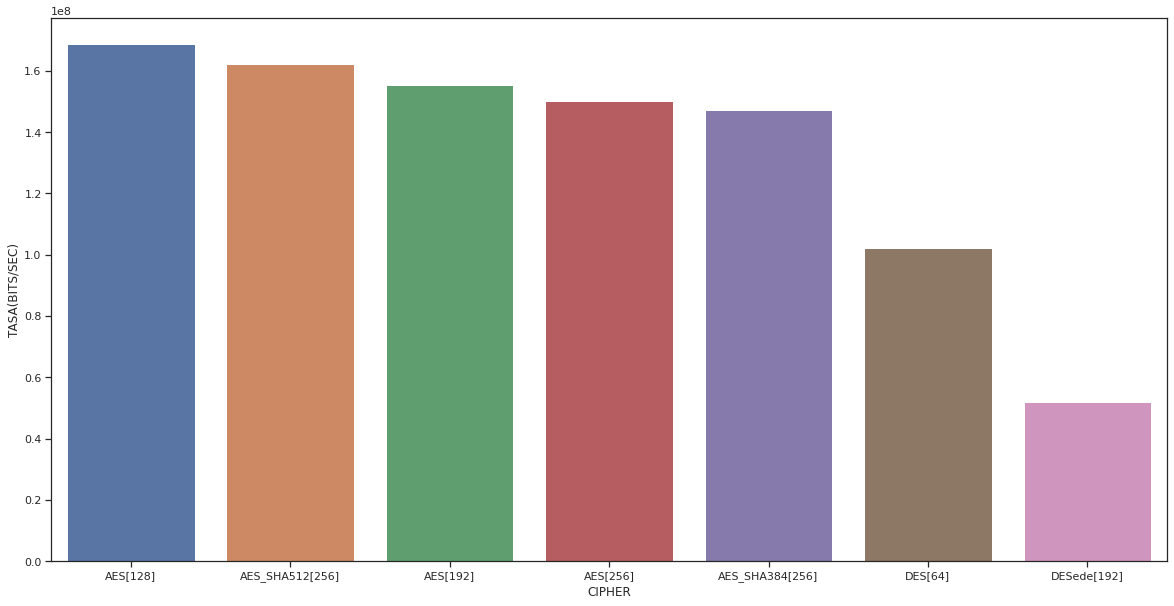

In [485]:
sns.barplot(x="CIPHER",y="TASA(BITS/SEC)",data=info_df)

<AxesSubplot:xlabel='CIPHER', ylabel='TASA(MB/SEC)'>

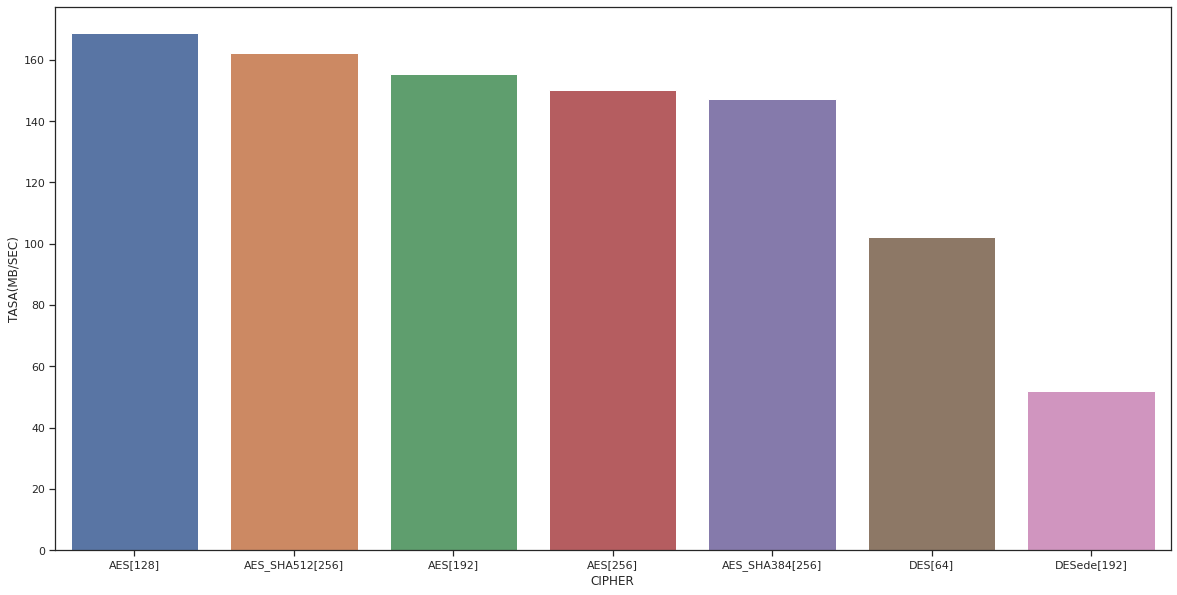

In [486]:

sns.barplot(x="CIPHER",y="TASA(MB/SEC)",data=info_df)

# Decrypt Mode

In [487]:
_info_df = pd.DataFrame(_infos,columns=["CIPHER","TIME(SEC)","TIME(MIN)","SIZE(BITS)","TASA(BITS/SEC)","SIZE(BYTES)","TASA(BYTES/SEC)","SIZE(MB)","TASA(MB/SEC)"])
_info_df = _info_df.sort_values("TIME(SEC)",ascending=True)
_info_df

CIPHER  TIME(SEC)  TIME(MIN)   SIZE(BITS)  TASA(BITS/SEC)  \
5  AES_SHA384[256]    703.895  11.731583  20665220656    2.935839e+07   
4         AES[256]    709.823  11.830383  20665220656    2.911320e+07   
2         AES[128]    711.830  11.863833  20665220656    2.903112e+07   
3         AES[192]    741.676  12.361267  20665220656    2.786287e+07   
6  AES_SHA512[256]    742.977  12.382950  20665220656    2.781408e+07   
0          DES[64]    941.495  15.691583  20665220656    2.194937e+07   
1      DESede[192]   1356.863  22.614383  20665220656    1.523015e+07   

   SIZE(BYTES)  TASA(BYTES/SEC)      SIZE(MB)  TASA(MB/SEC)  
5   2583152582     3.669798e+06  20665.220656     29.358385  
4   2583152582     3.639150e+06  20665.220656     29.113202  
2   2583152582     3.628890e+06  20665.220656     29.031118  
3   2583152582     3.482859e+06  20665.220656     27.862868  
6   2583152582     3.476760e+06  20665.220656     27.814079  
0   2583152582     2.743671e+06  20665.220656     21.949368  
1   2583152582     1.903768e+06  20665.220656     15.230145

<AxesSubplot:xlabel='CIPHER', ylabel='TIME(SEC)'>

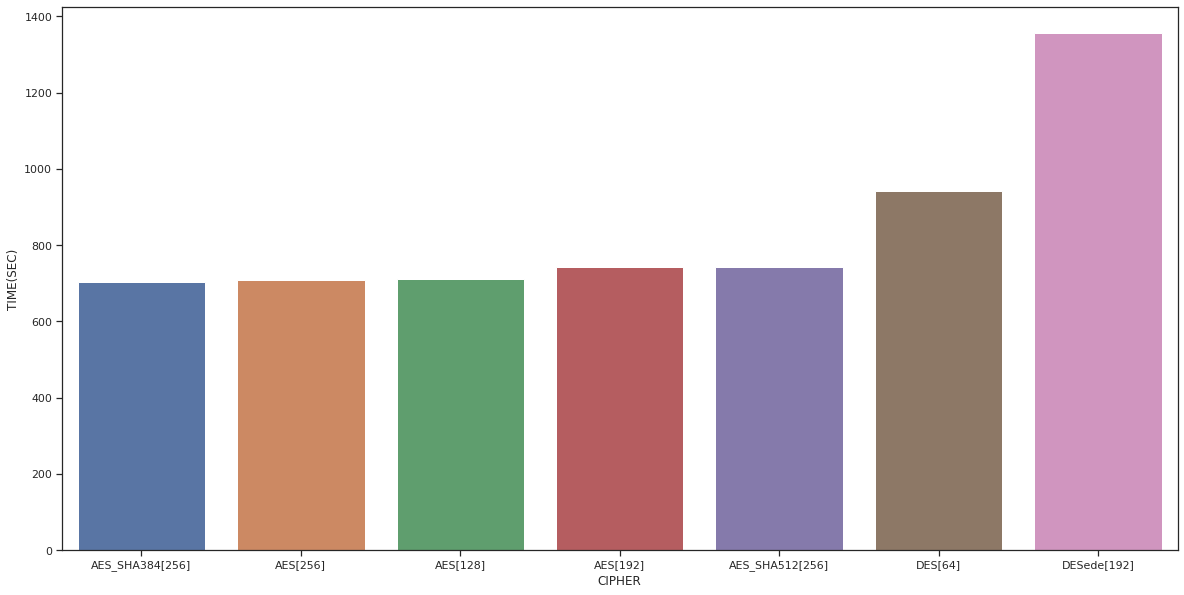

In [488]:
sns.barplot(x="CIPHER",y="TIME(SEC)",data=_info_df)

<AxesSubplot:xlabel='CIPHER', ylabel='TASA(MB/SEC)'>

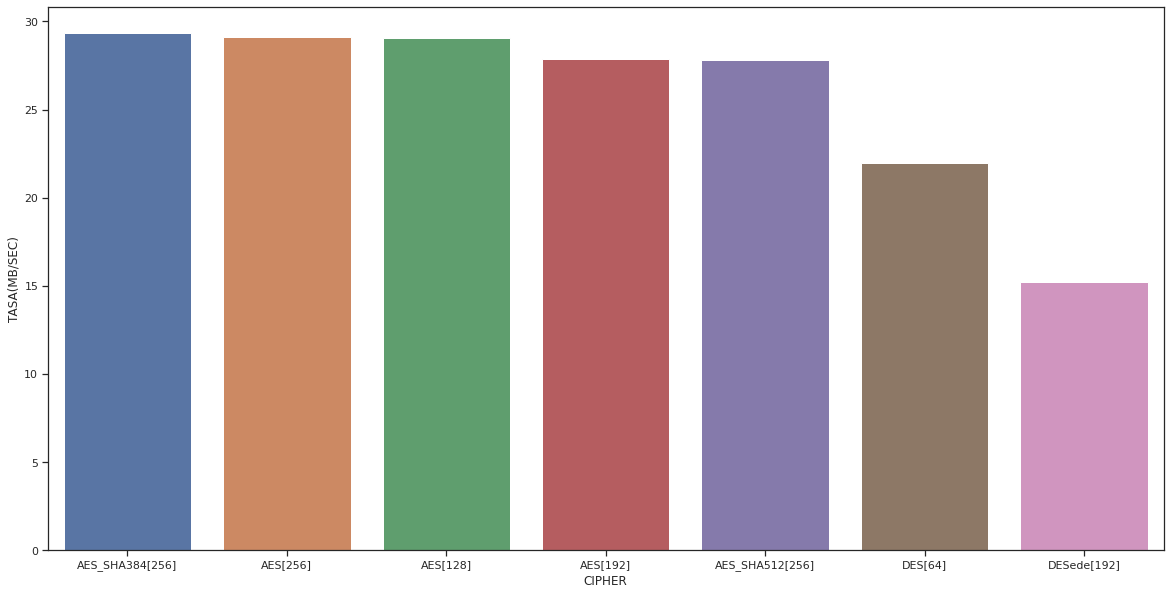

In [489]:
sns.barplot(x="CIPHER",y="TASA(MB/SEC)",data=_info_df)